# What is iptables?
In linux operating system, the firewalling is taken care of using netfilter. Which is a kernel module that decides what packets are allowed to come in or to go outside.

iptables are just the interface to netfilter. The two might often be thought of as the same thing. A better perspective would be to think of it as a back end and a front end.

## What was firewall again?
To cover the fundamentals, firewalling is the idea of deciding which packets are allowed to go in/out of the system.

The packets in the internet (or any other network for that matter) are transferred using ports. We have system reserved ports for well-known services such as NGINX or Apache (which is 80/443).

We also have ports that are used by the user itself. For example when you have written a web application that runs on port 8000.

To decide which port is allowed to communicate to the outside world (or even on the localhost) is the firewall’s responsibility. You would command it to either accept, reject or drop a packet. Other things can also happen to a packet but let’s keep it simple.

## Why use iptables?
Now that you know what firewall and iptables are, let’s see how we can use them. Mostly people would go for the simple solution of using *firewalld* or *ufw* as I was, before I was introduced to the beautiful and elegant iptables.

**firewalld** and **ufw** are simple and that’s what makes them popular. But simplicity also reduces the flexibility and the full feature that you’re exposed to when you decide to work with iptables.

On their own, firewalld and ufw only allow you to accept or reject a packet. But there’s a heck of a lot more you can do with a packet. NAT, logging and forwarding are just a few to name.

So here’s a list of reasons why you should use iptables and not be scared of their complexity:

1. It’s a full feature tool providing you with everything you need

2. You get more flexibility regarding the things you want to with a packet.

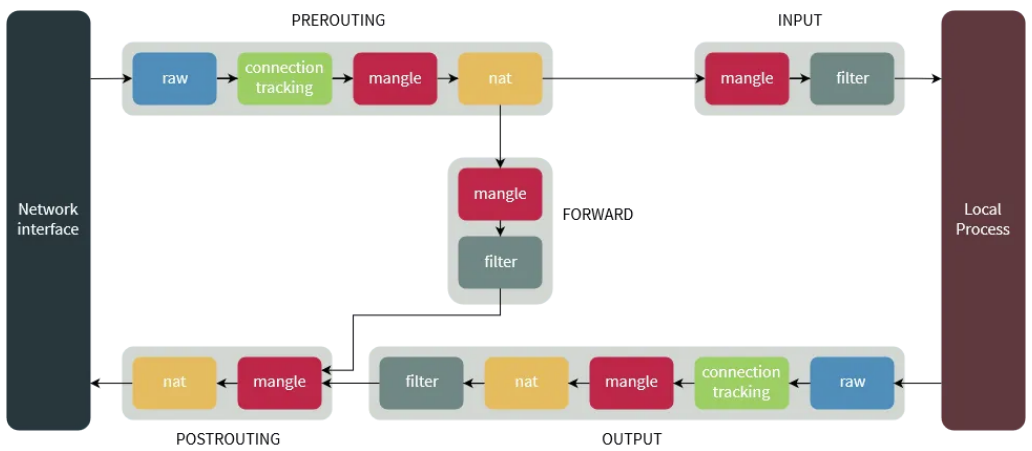

## iptables architecture
iptables consists of different components which are discussed below:

**chains**: There are 5 chains in iptables and each is responsible for a specific task. These chains are: 

>prerouting, 

>input, 

>forward, 

>output & 

>postrouting. 

As their name suggests, they’re responsible for packets either as soon as they arrive, if they are destined for local socket or just before routing to the outer world. We’ll discuss these below.

**tables**: Again, different tables are responsible for different tasks. The list contains: 

>filter, 

>nat, 

>mangle, 

>raw & 

>security. 

The first two are the most used. 

*Filter* is responsible for filtering and restricting the packets to/from our computer. 

*Nat* is responsible for Network Address Translation. We’ll discuss these terms below as well.

**targets**: 

Targets specify where a packet should go. 

This is decided using either iptables' own targets: ACCEPT, DROP, or RETURN, or 

it’s extensions’ target which are 39 at the moment and the most popular ones are:
> DNAT,

> LOG,

> MASQUERADE,

> REJECT,

> SNAT,

> TRACE and

> TTL. 

Targets are divided into terminating and non-terminating. Which is just what the name suggests. 

> Terminating targets ends rule traversal and the packets will be stopped there, 

but 

> non-terminating ones touch a packet in some way and the rule traversal will continue afterward.

## iptables chains
As mentioned above, each chain is responsible for a specific task. So let’s dig a little deeper.

### Prerouting: 
this chain decides what happens to a packet as soon as it arrives at the network interface. We have different options such as altering the packet (for NAT probably), dropping a packet, or doing nothing at all and letting it slip and be handled elsewhere along the way.

### Input: 
This is one of the popular chains as it almost always contains strict rules to avoid some evil doers on the internet harming our computer. If you want to open/block a port, this is where you’d do it.

### Forward: 
This chain is responsible for packet forwarding. Which is what the name suggests. We may want to treat a computer as a router and this is where some rules might apply to do the job.

### Output: 
This chain is the one responsible for all your web browsing among many others. You can’t send a single packet without this chain allowing it. You have a lot of options whether you want to allow a port to communicate or not. It’s the best place to limit your outbound traffic if you’re not sure what port each application is communicating through. (A small hint: use the command ss -tulpen).

### Postrouting: 
This chain is where packets leave their trace last, before leaving our computer. This is used for routing among many other tasks just to make sure the packets are treated the way we want them to.

Most of your use cases on a regular basis would be to Input & Output chain. With small modifications to other chains — which are not a day-to-day need most of the time.

## iptables tables

Although the title has rhyme to it, you won’t need a lot of this item on a day-to-day basis. Your main use case, most of the time is on filter table. Which is the default table and you wouldn’t need any switch to activate it. That being said, if you don’t specify any table, filter is used by default. So bear that in mind and continue below where I explain each table.

### Filter: 
This is the table most used on a daily basis. Which is why it’s the default table. In this table you would decide whether a packet is allowed in/out your computer. If you want to block a port to stop receiving anything, this is your stop.

### Nat: 
This table is the second most popular table and is responsible for creating new connection. Which is shorthand for Network Address Translation. And if you’re not familiar with the term don’t worry. I’ll give you an example below.

### Mangle: 
For specialized packets only. This table is for changing something inside the packet either before coming in or leaving out.

### Raw: 
This table is dealing with the raw packet as the name suggests. Mainly this is for tracking the connection state. We’ll see examples of this below when we want to allow success packets from SSH connection.

### Security: 
It is responsible for securing your computer after the filter table. Which consists of SELinux. If you’re not familiar with the term, it’s a very strong security tool on modern linux distributions.

### Where to start?
To get started, simply turn your other firewall utilities off, so that only one effective configuration remains and that’s iptables.

To do that, use one of the following:

If you’re on a debian machine, use 

>**systemctl disable --now ufw**.

If you’re on a redhad machine, use 

>**systemctl disable --now firewalld**.

After that you can start configuring your firewall through iptables.

How to use iptables?
The rest of this article is how to do a task in iptables. Make sure you run these as super user.

To list the current configuration:

>iptables -L -n -v --line-numbers

-L for list.

-n for numeric output (disable name resolution; results in faster performance).

-v for verbose (more information is involved).

#### To stop every single packet from going in/out of your system. 

For security reasons, make sure to do this so that no other packet that you explicitly specify, is going to be transferred.

>iptables -P INPUT DROP

>iptables -P OUTPUT DROP

>iptables -P FORWARD DROP

-P for policy. There are different policies such as those mentioned above.

#### To allow packets inside your loopback interface to travel without problem

>iptables -A INPUT -i lo -j ACCEPT

>iptables -A OUTPUT -o lo -j ACCEPT
-A for append. You can also insert, delete or update with different switches.

-i for input interface. The interface that packets arrive at.

-o for output interface. The interface the packets travel through.

-j for jump. You can choose to accept, reject, drop, log etc. with a packet.

#### To allow DNS & DHCP packets to travel in & out your computer.

>iptables -A INPUT -p udp --dport 67 -j ACCEPT

>iptables -A INPUT -p tcp --dport 67 -j ACCEPT

>iptables -A OUTPUT -p udp --dport 53 -j ACCEPT

>iptables -A OUTPUT -p tcp --dport 53 -j ACCEPT

>iptables -A OUTPUT -p udp --dport 68 -j ACCEPT

>iptables -A OUTPUT -p tcp --dport 68 -j ACCEPT

-p for protocol. 

Different protocols can be used such as **tcp**, **udp**, **gre** and so on. 

Normally DNS & DHCP communicate through UDP protocol, but for larger packets TCP is used and that’s why I have mentioned the those rules as well.

>--dport for destination port. 

You can also use 

>--sport for source port.

To open SSH connection when your computer is a client you have to add two rules in both direction.

>iptables -A OUTPUT -p tcp --dport 22 -j ACCEPT

>iptables -A INPUT -m conntrack --ctstate RELATED,ESTABLISHED -j ACCEPT

-m is a switch to use iptables’ extension. You can read more about different extensions using man iptables-extension. Another example of these extenstions is limit which restricts the number of packets to a rule.

SSH connections does not happen in one direction only. Instead, you would send a packet to destination port 22, and the packets would come to your computer with the state of RELATED and ESTABLISHED. Connection tracker distinguishes that for you and you don’t have to worry yourself about it.

To allow SSH connection when your computer is a server.

>iptables -A INPUT -p tcp --dport 22 -j ACCEPT

>iptables -A OUTPUT -m conntrack --ctstate RELATED,ESTABLISHED -j ACCEPT

This is the opposite direction of the previous rule, which opens packets to 22, and send success packets having the state of RELATED and ESTABLISHED back to the client.

If you want to be able to ping other computers, and let other computers ping yours, you should allow icmp packets.

>iptables -A INPUT -p icmp -j ACCEPT

>iptables -A OUTPUT -p icmp -j ACCEPT

If you want to be able to browse web pages, this is what you should do.

>iptables -A OUTPUT -p tcp --dport 80 -j ACCEPT

>iptables -A OUTPUT -p tcp --dport 443 -j ACCEPT

This will open both HTTP and HTTPS traffic to go out of your system.

You would definitely want to log the rest of the packets which are not accepted so that you have a visual of what’s going on. It will also help you if you wanted to open a port in the future.

>iptables -N LOGGING

>iptables -A INPUT -j LOGGING

>iptables -A OUTPUT -j LOGGING

>iptables -A FORWARD -j LOGGING

>iptables -A LOGGING -j LOG --log-level error --log-prefix "iptables-dropped: "

>iptables -A LOGGING -j DROP

The first line creates a new chain. And in the next 3 lines, we will forward every packet to the newly created chain.

It doesn’t take genius to figure out that the last 2 lines will log a packet, and it will drop it afterwards.

--log-prefix is an argument to the LOG target, which you can read more about in man iptables-extension.

--log-level is also an argument to LOG target, which indicates how verbose we want to receive the log. error is a pretty good log level as we’re only interested about non-allowed packets.

The difference between DROP and REJECT is that DROP does not notify the sender about the dropped packet, which REJECT explicitly notifies the sender.

When you send a packet to REJECT target, the sender will receive connection reset by peer.

If you want to apply NAT to your iptables, depending on whether you want to apply it to incoming connections or outgoing connection, or whether your computer’s IP address is static or dynamic, you can use the following rules.

iptables -t nat -A OUTPUT -p tcp --dport 22 --destination 192.168.40.40 -j DNAT --to-destination 123.123.123.123:4040

After the above command, every outgoing traffic from your computer heading to IP address 192.168.40.40 port 22 will be sent to IP address 123.123.123.123 port 4040. This makes it possible for a NAT in the destination network to be accessible from outside that network.

NAT or Network Address Translation is an act of having a private IP address inside a network that can not be accessible from outside, unless a configuration is involved inside the router. You can read more about it here.

--destination flag will filter packets based on the destination IP address. Which is obvious of course but worth mentioning.

To negate a filter use exclamation point.

You can always negate a rule by preceding it with !. For example ! --source 192.168.40.40 will take effect for any source address other than 192.168.40.40 .

iptables -t nat -A POSTROUTING -p tcp --dport 80 -j SNAT --to-source 10.0.0.56:8000-8010
After applying the above rule, every packet for any destination IP address and with port 80 will change the source address to 10.0.0.56:8000–8010, which is a range of ports specified by a dash . This makes it possible for a NAT inside the current network of your computer to be accessible from the outside world (internet). Perhaps your router’s (access point) IP address is 10.0.0.56 and you want the packets arrive safely back to their origin.

>iptables -A FORWARD -i wlan0 -j ACCEPT
>iptables -t nat -A POSTROUTING -o eth0 -j MASQUERADE

Credit to this answer. This is where MASQUERADE is suited best when you need to forward every traffic from a specific interface to be routed through your computer without changing anything inside packet. Of course you would need the following kernel parameter to be set before doing the above:

>sysctl net.ipv4.ip_forward=1

So that you computer is capable of routing the packets. The above command is only a runtime configuration and if you need persistency across reboots, you would do the following.

>echo net.ipv4.ip_forward = 1 > /etc/sysctl.d/30-ip-forward.conf

And that concludes our adventure across iptables jungle. It’s a tool with vast majority of features and I’d say that I haven’t even scratched the surface. But the above commands are the most used ones, and you’re going to find yourself using one or the other every now and then.

Read the manual carefully as they have good insights:

>man iptables
>man iptables-extension

### Conclusion

In this article I tried demystifying the ins & outs of iptables, a tool to manage firewalling in linux. Most other tools such as firewalld and ufw would be simple enough to get you through the day, but simplicity comes with a cost. You wouldn’t get a lot of flexibility of handling the rules that you see fit.data

I have also shown you a couple of examples of how you might manage it, alongside with a clear explanation of every command. My advice to you would be to master this tool as it comes in handy quite a lot.